# Ejercicio de Feedback 1, por Carlos Bilbao Lara
---

Para la realización de este ejercicio se ha utilizado el csv extraido de la página: https://www.investing.com/equities/microsoft-corp-historical-data (MSFT) y https://www.investing.com/equities/amazon-com-inc-historical-data (AMZN) entre las fechas 01/01/2019 y 01/10/2023 tal y como se explica en el enunciado del ejercicio




## Parte 1
---

Extrae los campos Date, Price, Open, High, Low, Vol. and Change % de investing.com relacionados con un valor bursátil que sea de tu interés. El rango de tiempo será el siguiente:
Desde: 1 enero 2019
Hasta: 1 octubre 2023


a) A partir del fichero de texto que se baje de investing.com, cree un dataframe con esos datos y estudie su contenido utilizando funciones en python pandas. Ese estudio del contenido debe incluir:
- las primeras filas del dataframe,
- las últimas filas del dataframe,
- el índice que utiliza
- las columnas que tiene el dataframe

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# import csv as a dataframe
df = pd.read_csv( "./MSFT Historical Data.csv" )

# show the first 6 rows
print( df.head() )

         Date   Price    Open    High     Low    Vol. Change %
0  09/29/2023  315.75  317.75  319.47  314.98  24.15M    0.67%
1  09/28/2023  313.64  310.99  315.48  309.45  19.30M    0.27%
2  09/27/2023  312.79  312.30  314.30  309.69  19.31M    0.21%
3  09/26/2023  312.14  315.13  315.88  310.02  26.06M   -1.70%
4  09/25/2023  317.54  316.59  317.67  315.00  16.54M    0.17%


In [2]:
# show the last 6 rows
print( df.tail() )

            Date   Price    Open    High     Low    Vol. Change %
1190  01/08/2019  102.80  103.04  103.97  101.71  31.51M    0.73%
1191  01/07/2019  102.06  101.64  103.27  100.98  35.66M    0.13%
1192  01/04/2019  101.93   99.72  102.51   98.93  44.06M    4.65%
1193  01/03/2019   97.40  100.10  100.19   97.20  42.58M   -3.68%
1194  01/02/2019  101.12   99.55  101.75   98.94  35.33M   -0.44%


In [3]:
# show index
print( df.index )

RangeIndex(start=0, stop=1195, step=1)


In [4]:
# show columns available in the dataframe
print( df.columns )
#also
df[0:0]

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


,Date,Price,Open,High,Low,Vol.,Change %


In [5]:
# show basics stadistics
print( df.describe() )

up_to_200 = df[df["Price"] > 200]
print( f"\nHow many days the price is higher than 200: { len( up_to_200 ) }" )

            Price         Open         High          Low
count  1195.00000  1195.000000  1195.000000  1195.000000
mean    229.95087   229.875004   232.292452   227.398033
std      68.53901    68.585413    69.231166    67.858540
min      97.40000    99.550000   100.190000    97.200000
25%     166.91000   167.640000   170.350000   165.525000
50%     239.82000   238.700000   242.500000   235.940000
75%     286.14500   285.765000   289.250000   282.835000
max     359.49000   361.750000   366.780000   352.430000

How many days the price is higher than 200: 822


<function matplotlib.pyplot.show(close=None, block=None)>

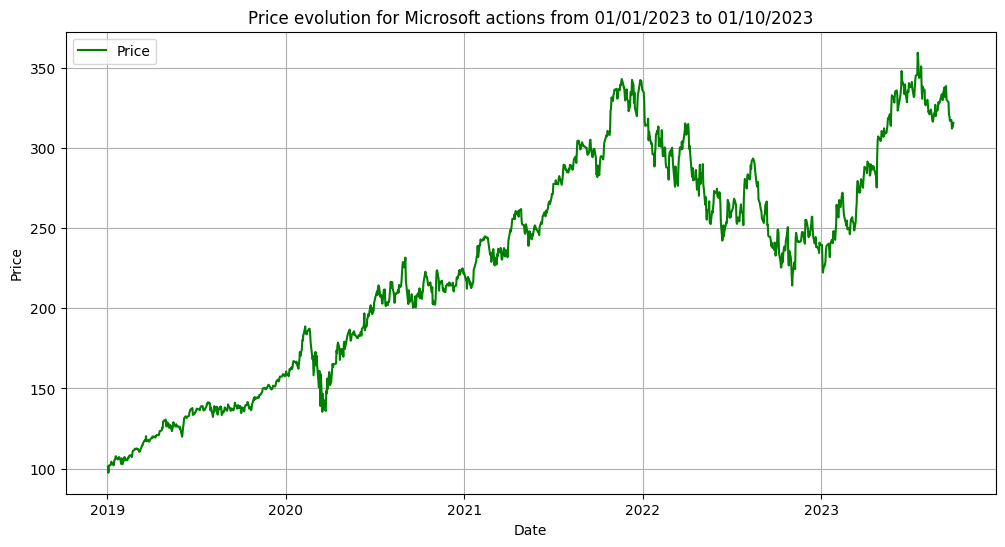

In [6]:
# Price evolution throught this period of time
# Convert the datetimes to be usefull
df["Date"] = pd.to_datetime( df["Date"] )

#sort the dates to have it in order
df.sort_values( "Date", inplace=True )

plt.figure( figsize=( 12,6 ) )
plt.plot( df["Date"], df["Price"], label="Price", color="green" )
plt.title( "Price evolution for Microsoft actions from 01/01/2023 to 01/10/2023" )
plt.xlabel( "Date" )
plt.ylabel( "Price" )
plt.grid( True )
plt.legend()
plt.savefig( "plt1column1a.png" )
plt.show

In [7]:
# As it could be observe in the graphic, Microsfot actions price has got a big up,
# let see how many

price_at_01012019 = df["Price"].iloc[0] # the first one( it is sorted by date )
price_at_01102023 = df["Price"].iloc[-1] # the last one

percentage_gain =(( price_at_01102023 - price_at_01012019 ) / price_at_01012019 ) * 100

print( f"It has grown up: { percentage_gain }%" )


It has grown up: 212.25276898734177%


b) Cree un dataframe basado en el dataframe inicial pero sólo con los datos relacionados con los días de cotización en el que el volumen de negociación superó el 50% de la media de todos los días.

In [8]:
# Restoring the changes realized in the last question
df = pd.read_csv( "./MSFT Historical Data.csv" )

# Taking the data only when the volume is up to the 50% of the mean:
# need to transform the Vol data to floats
df["Vol."] = df["Vol."].str.replace( 'M', '' ).astype( float )

# Calculate the 50% of the average
average = df["Vol."].mean()
fifty_average = average*0.5

# Create a second dataframe with all that are up to the 50% of the average
df_up_50_average= df[df["Vol."] > fifty_average]

print( f"The original dataframe has { len( df ) } items and the new one has { len( df_up_50_average ) } items\n" )

# Show an example of them
print( df_up_50_average.head() )



The original dataframe has 1195 items and the new one has 1176 items

         Date   Price    Open    High     Low   Vol. Change %
0  09/29/2023  315.75  317.75  319.47  314.98  24.15    0.67%
1  09/28/2023  313.64  310.99  315.48  309.45  19.30    0.27%
2  09/27/2023  312.79  312.30  314.30  309.69  19.31    0.21%
3  09/26/2023  312.14  315.13  315.88  310.02  26.06   -1.70%
4  09/25/2023  317.54  316.59  317.67  315.00  16.54    0.17%


c) Cree un fichero de extension .csv con este dataframe que acaba de construir.

In [9]:
# Export to csv
df_up_50_average.to_csv( "up_50_average.csv" )

d) Cree un plot con las columnas Price, Open, High and Low para todos los días de cotización de los datos que se bajó.

<function matplotlib.pyplot.show(close=None, block=None)>

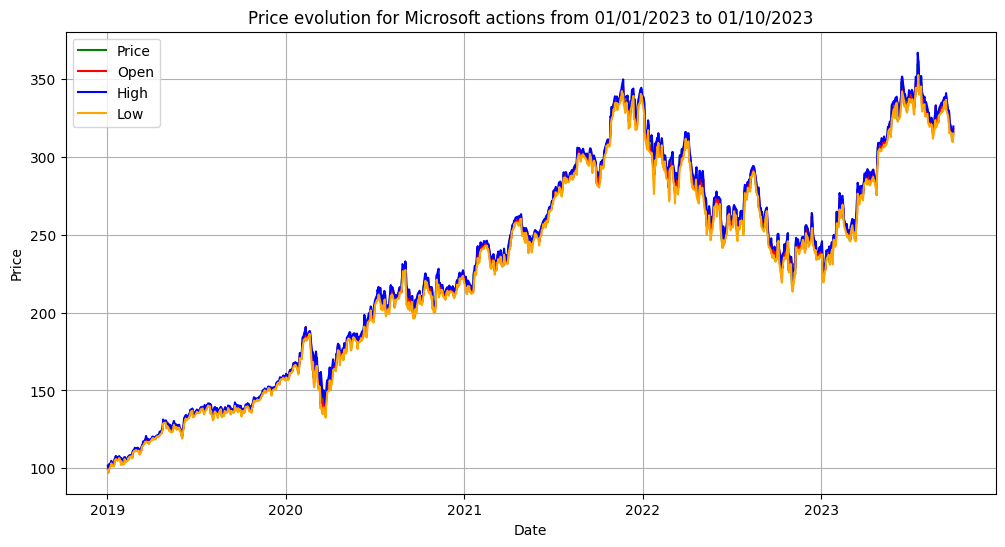

In [10]:
# Restoring the changes realized in the last question
df = pd.read_csv( "./MSFT Historical Data.csv" )

# Convert the datetimes to be usefull
df["Date"] = pd.to_datetime( df["Date"] )
# Sort the dates to have it in order by date
df.sort_values( "Date", inplace=True )

# Create the plot for Price, Open, High and Low
plt.figure( figsize=( 12,6 ) )
plt.plot( df["Date"], df["Price"], label="Price", color="green" )
plt.plot( df["Date"], df["Open"], label="Open", color="red" )
plt.plot( df["Date"], df["High"], label="High", color="blue" )
plt.plot( df["Date"], df["Low"], label="Low", color="orange" )

plt.title( "Price evolution for Microsoft actions from 01/01/2023 to 01/10/2023" )
plt.xlabel( "Date" )
plt.ylabel( "Price" )
plt.grid( True )
plt.legend()
plt.savefig( "plot4columns1d.png" )
plt.show

e) Pinte cada gráfica de un color y cree la correspondiente leyenda.Importante: la leyenda no debe ocultar ninguna parte de la gráfica.

<function matplotlib.pyplot.show(close=None, block=None)>

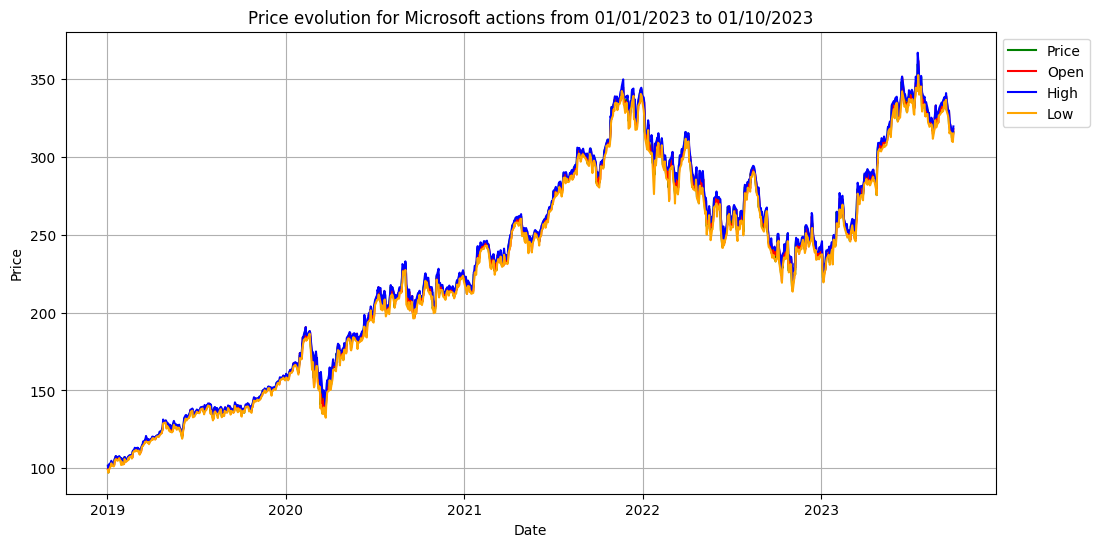

In [11]:
# Create the plot for Price, Open, High and Low
# Due to almost all the requisites were done above, just modify legend for this
# one
plt.figure( figsize=( 12,6 ) )
plt.plot( df["Date"], df["Price"], label="Price", color="green" )
plt.plot( df["Date"], df["Open"], label="Open", color="red" )
plt.plot( df["Date"], df["High"], label="High", color="blue" )
plt.plot( df["Date"], df["Low"], label="Low", color="orange" )

plt.title( "Price evolution for Microsoft actions from 01/01/2023 to 01/10/2023" )
plt.xlabel( "Date" )
plt.ylabel( "Price" )
plt.grid( True )
# Move the legend outside of the graphic
plt.legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
plt.savefig( "plot4columns1e.png" )
plt.show

f) Configure también los correspondientes eje x e y, el título del plot y sus unidades.

<function matplotlib.pyplot.show(close=None, block=None)>

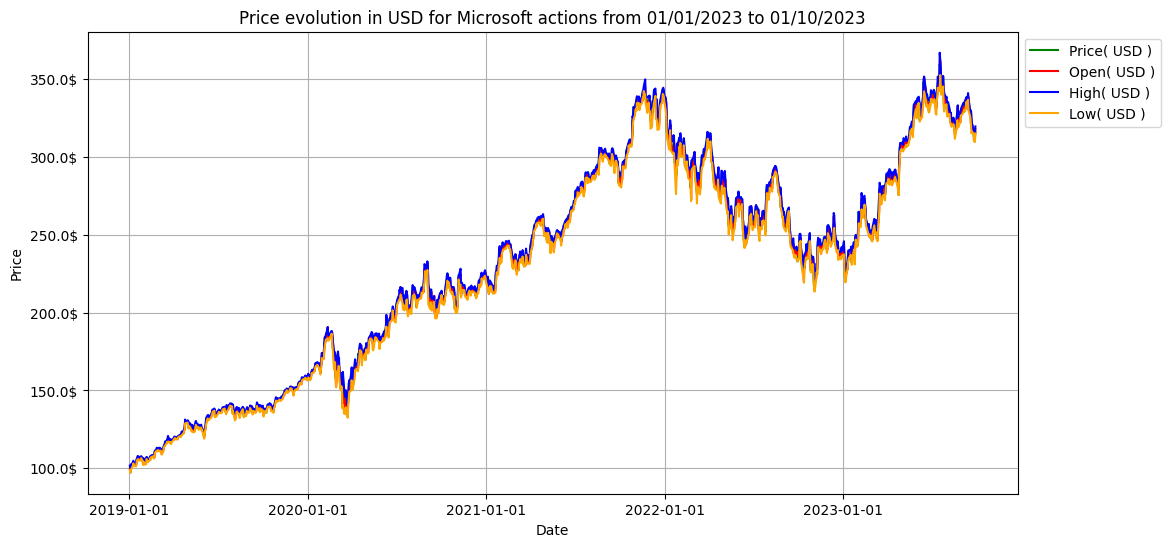

In [12]:
plt.figure( figsize=( 12,6 ) )
plt.plot( df["Date"], df["Price"], label="Price( USD )", color="green" )
plt.plot( df["Date"], df["Open"], label="Open( USD )", color="red" )
plt.plot( df["Date"], df["High"], label="High( USD )", color="blue" )
plt.plot( df["Date"], df["Low"], label="Low( USD )", color="orange" )

plt.title( "Price evolution in USD for Microsoft actions from 01/01/2023 to 01/10/2023" )
plt.xlabel( "Date" )
plt.ylabel( "Price" )

# Formatter to add the date to x axis
plt.gca().xaxis.set_major_formatter( plt.matplotlib.dates.DateFormatter( '%Y-%m-%d' ) )
# Locator to add the date to x axis and being sure that dates are not overlapped
plt.gca().xaxis.set_major_locator( plt.matplotlib.dates.AutoDateLocator() )

# Formatter to add  $ symbol to y axis
format = mticker.FuncFormatter( lambda x, pos: f'{ x }$' )
plt.gca().yaxis.set_major_formatter( format )
plt.grid( True )

# Move the legend outside the graphic
plt.legend( loc="upper left", bbox_to_anchor=( 1,1 ) )
plt.savefig( "plot4columns1f.png" )
plt.show

## Parte 2


---


a) Utlizando el mismo dataframe inicial con todas las cotizaciones, ahora cree un histograma con el volumen de contratación diario.

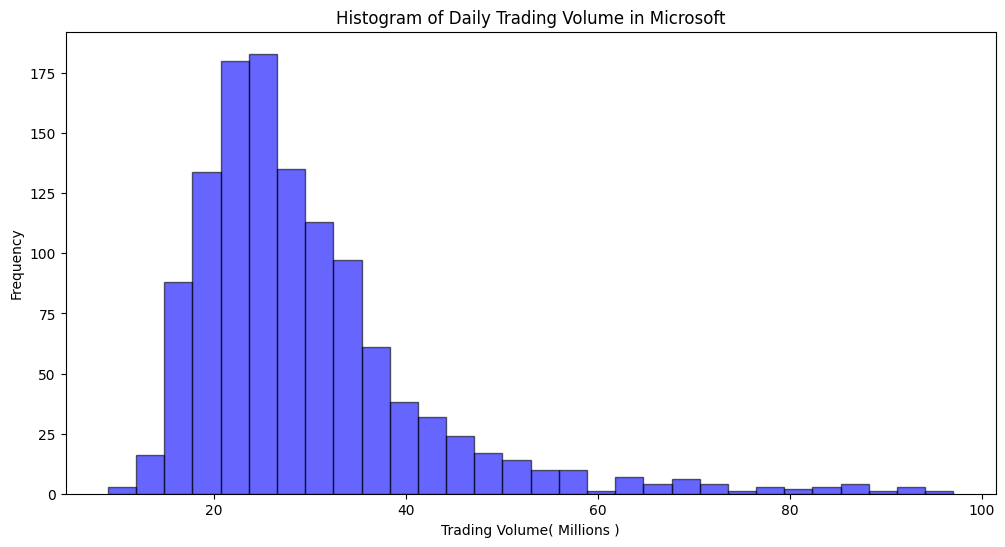

In [13]:
# Restoring the changes realized in the last question
df = pd.read_csv( "./MSFT Historical Data.csv" )

# Need to transform the Vol data to floats
df["Vol. float"] = df["Vol."].str.replace( 'M', '' ).astype( float )

plt.figure( figsize=( 12, 6 ) )
plt.hist( df["Vol. float"], bins=30, color='blue', alpha=0.6, edgecolor='black' )

plt.title( "Histogram of Daily Trading Volume in Microsoft" )
plt.xlabel( "Trading Volume( Millions )" )
plt.ylabel( "Frequency" )
plt.savefig( "MicrosoftVol2a.png" )
plt.show()

# This histogram reflects the frequency of different trading volumes divided the
# range of volumes into 30 equal intervals( or bins )

b) Cree otro histograma con el porcentaje de cambio de la cotización diario

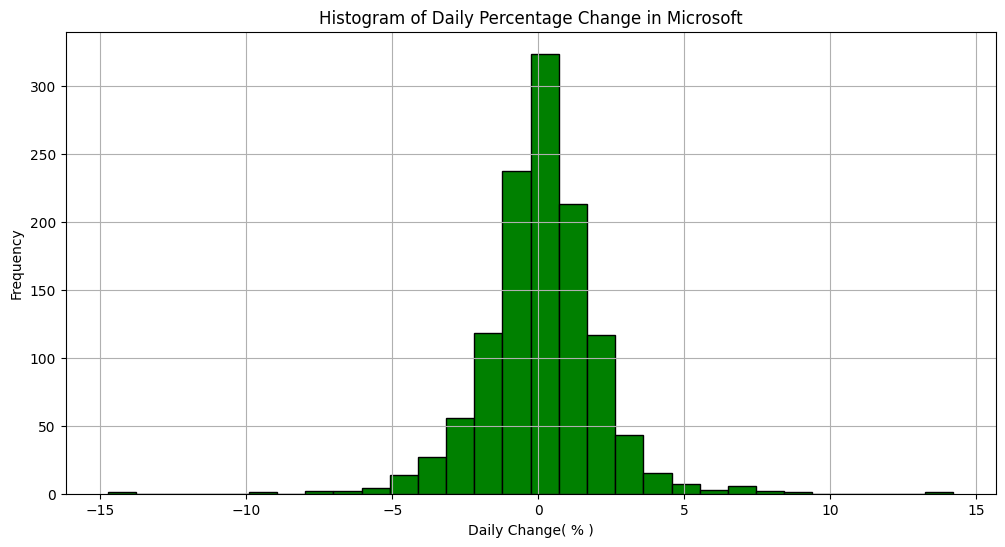

In [14]:
# Convert change % column into a numeric column
df["Change float"] = df["Change %"].str.replace( '%', '' ).astype( float )

# Create the histogram for this new column
plt.figure( figsize=( 12, 6 ) )
plt.hist( df["Change float"], bins=30, color='green', edgecolor='black',
         label="Change %" )
plt.title( "Histogram of Daily Percentage Change in Microsoft" )
plt.xlabel( "Daily Change( % )" )
plt.ylabel( "Frequency" )
plt.grid( True )
plt.savefig( "MicrosoftChange2b.png" )
plt.show()


c) Añada la suficiente información al gráfico (leyenda, ejes, título, colores).


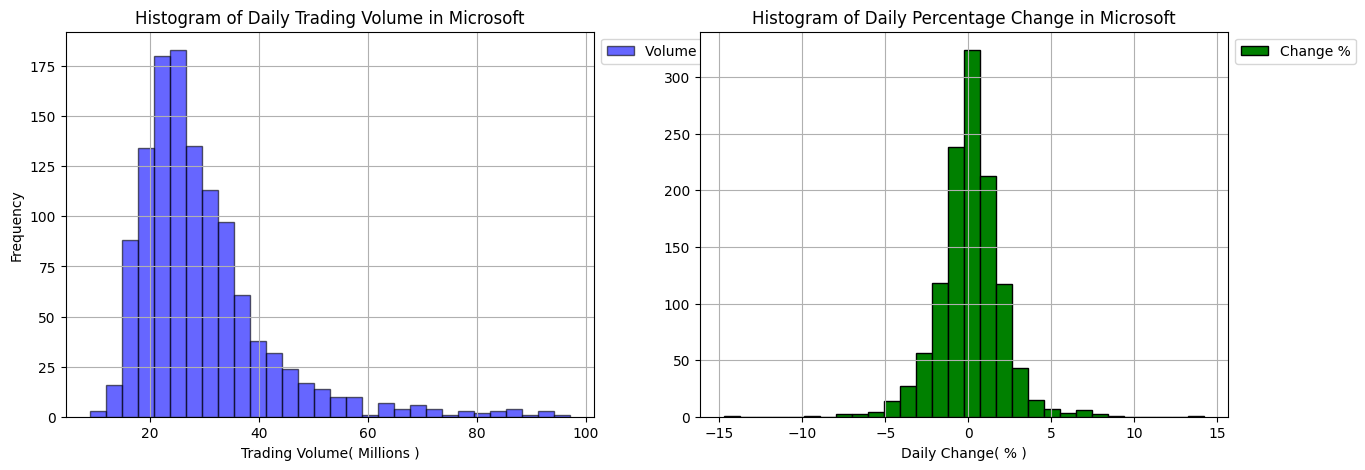

In [15]:
# Restoring the changes realized in the last question
df = pd.read_csv( "./MSFT Historical Data.csv" )

# Need to transform the Vol data to floats
df["Vol. float"] = df["Vol."].str.replace( 'M', '' ).astype( float )

# Need to transform the change % column to floats
df["Change float"] = df["Change %"].str.replace( '%', '' ).astype( float )


# Create 2 plots in order to have them side by side and easier to view
fig, subplots = plt.subplots( nrows=1, ncols=2, figsize=( 15, 5 ) )

# Histogram for Trading Volume
subplots[0].hist( df["Vol. float"], bins=30, color='blue', alpha=0.6, edgecolor='black', label="Volume by millions" )
subplots[0].set_title( "Histogram of Daily Trading Volume in Microsoft" )
subplots[0].set_xlabel( "Trading Volume( Millions )" )
subplots[0].set_ylabel( "Frequency" )
subplots[0].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[0].grid( True )

# Histogram for Daily Percentage Change
subplots[1].hist( df["Change float"], bins=30, color='green', edgecolor='black', label="Change %" )
subplots[1].set_title( "Histogram of Daily Percentage Change in Microsoft" )
# i only want to show at the left, so i wont put Y label in this one
subplots[0].set_ylabel( "Frequency" )
subplots[1].set_xlabel( "Daily Change( % )" )
subplots[1].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[1].grid( True )
plt.savefig( "AmazonHist2c.png" )

plt.show()


d) Cree dos nuevos histogramas. En esta ocasión, en ambos histogramas, añada la misma información sobre su acción (pasos a,b y c de esta parte 2), pero ahora añadiendo también los mismos datos de otra acción de bolsa perteneciente a un competidor de la primera acción que usted eligiera

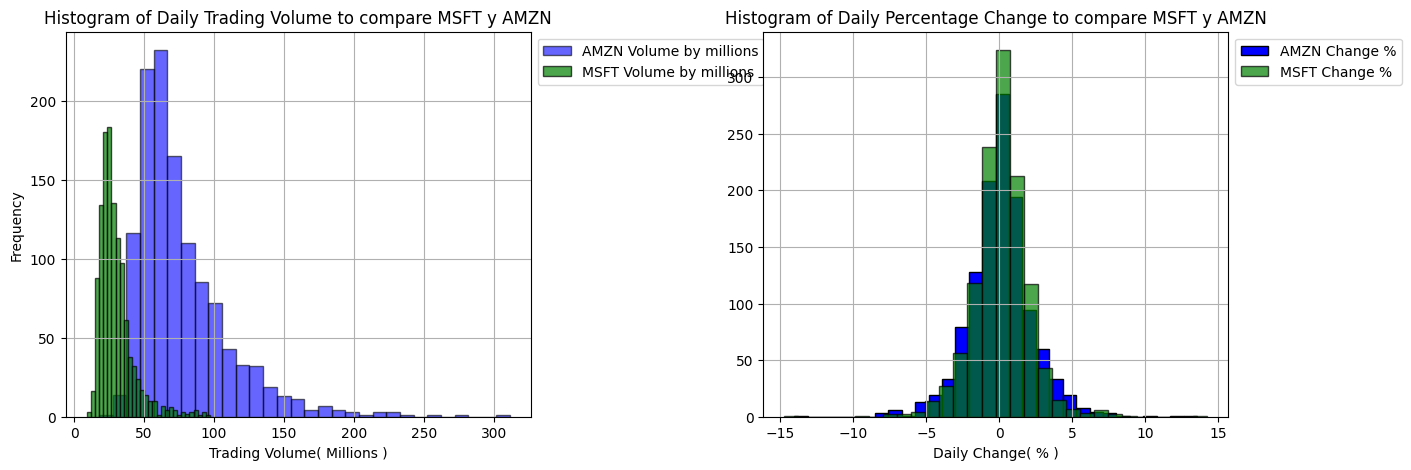

In [16]:
# Restoring the changes realized in the last question
df_competitor = pd.read_csv( "./AMZN Historical Data.csv" )

# Need to transform the Vol data to floats
df_competitor["Vol. float"] = df_competitor['Vol.'].str.replace( 'M', '' ).astype( float )

# Need to transform the change % column to floats
df_competitor["Change float"] = df_competitor['Change %'].str.replace( '%', '' ).astype( float )

# Create 2 plots in order to have them side by side and easier to view
fig, subplots = plt.subplots( nrows=1, ncols=2, figsize=( 15, 5 ) )

# Histogram for Trading Volume
subplots[0].hist( df_competitor["Vol. float"], bins=30, color='blue', alpha=0.6, edgecolor='black', label="AMZN Volume by millions" )
subplots[0].hist( df["Vol. float"], bins=30, color='green', alpha=0.7, edgecolor='black', label="MSFT Volume by millions" )
subplots[0].set_title( "Histogram of Daily Trading Volume to compare MSFT y AMZN" )
subplots[0].set_xlabel( "Trading Volume( Millions )" )
subplots[0].set_ylabel( "Frequency" )
subplots[0].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[0].grid( True )

# Histogram for Daily Percentage Change
subplots[1].hist( df_competitor["Change float"], bins=30, color='blue', edgecolor='black', label="AMZN Change %" )
subplots[1].hist( df["Change float"], bins=30,alpha=0.7, color='green', edgecolor='black', label="MSFT Change %" )
# i only want to show at the left, so i wont put Y label in this one
subplots[0].set_ylabel( "Frequency" )
subplots[1].set_title( "Histogram of Daily Percentage Change to compare MSFT y AMZN" )
subplots[1].set_xlabel( "Daily Change( % )" )
subplots[1].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[1].grid( True )
plt.savefig( "MicrosoftAmazon2d.png" )
plt.subplots_adjust( wspace=0.5 )
plt.show()

# as you can see, transparency has been added to the histograms in order to see one over the other

e) Añada la suficiente información al gráfico (leyenda, ejes, título, colores).

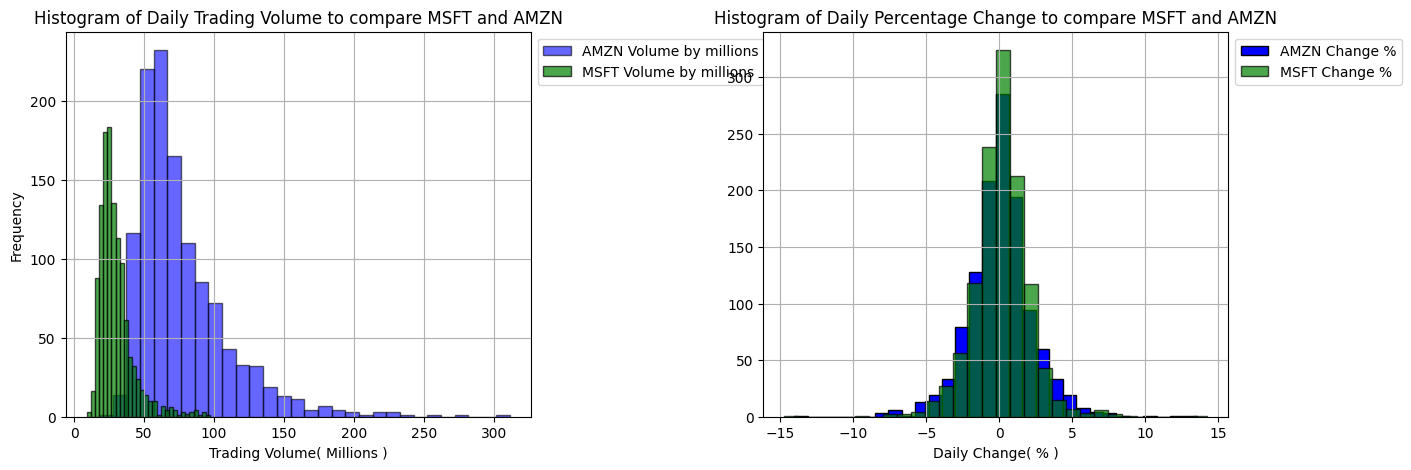

In [17]:
# Create 2 plots in order to have them side by side and easier to view
fig, subplots = plt.subplots( nrows=1, ncols=2, figsize=( 15, 5 ) )

# Histogram for Trading Volume
subplots[0].hist( df_competitor["Vol. float"], bins=30, color='blue', alpha=0.6, edgecolor='black', label="AMZN Volume by millions" )
subplots[0].hist( df["Vol. float"], bins=30, color='green', alpha=0.7, edgecolor='black', label="MSFT Volume by millions" )
subplots[0].set_title( "Histogram of Daily Trading Volume to compare MSFT and AMZN" )
subplots[0].set_xlabel( "Trading Volume( Millions )" )
subplots[0].set_ylabel( "Frequency" )
subplots[0].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[0].grid( True )

# Histogram for Daily Percentage Change
subplots[1].hist( df_competitor["Change float"], bins=30, color='blue', edgecolor='black', label="AMZN Change %" )
subplots[1].hist( df["Change float"], bins=30,alpha=0.7, color='green', edgecolor='black', label="MSFT Change %" )
subplots[1].set_title( "Histogram of Daily Percentage Change to compare MSFT and AMZN" )
# i only want to show at the left, so i wont put Y label in this one
subplots[0].set_ylabel( "Frequency" )
subplots[1].set_xlabel( "Daily Change( % )" )
subplots[1].legend( loc='upper left', bbox_to_anchor=( 1, 1 ) )
subplots[1].grid( True )
plt.savefig( "MicrosoftAmazon2e.png" )
plt.subplots_adjust( wspace=0.5 )
plt.show()

# as you can see, i have added transparency to the histograms in order to see one over the other

Escriba como comentario un breve párrafo con las conclusiones de los histogramas creados.

Observando el primer gráfico (Comparacion de Volumenes) se puede extraer que la empresa Amazon (AMZN),
en azul, mueve habitualmente mayores cantidades de dinero en las contrataciones, siendo la diferencia  entre sus máximos de aproximadamente de 200 millones de dólares que Microsfot (MSFT) en verde. Del mismo modo, se puede extraer que los Volúmenes de Microsoft se concentran en un rango más estrecho, lo que sugiere menos volatilidad, y por tanto manejar una cantidad más aproximable y predecible que Amazon

En la segunda gráfica (% de cambio) se puede observar que ambas empresas tienen una distribución similar, acumulando la mayoría de los cambios alrededor del 0. Sin embargo Amazon tiende a ser menos un poco menos estable y realizar mayor porcentaje de variaciones tanto a positivo como a negativo. Algo que se contrasta con la información obtenida en la gráfica anterior con los Volúmenes

## Parte 3


---

a) Utilizando scipy, calcule la función PDF y CDF de los cuatro histogramas que creón en la parte
2.

In [18]:
import numpy as np
import scipy.stats as stats

# First of all i will see if Volume or Change columns has any NaN data:
nan_amzn_volume = df["Vol."].isnull().any()
nan_msft_volume = df_competitor["Vol."].isnull().any()
nan_amzn_change = df["Change %"].isnull().any()
nan_msft_change = df_competitor["Change %"].isnull().any()

( nan_amzn_volume, nan_msft_volume,nan_amzn_change,nan_msft_change )

(False, False, False, False)

In [19]:
#Lets see if data has a normal distribution using Shapiro-Whilk's Test
#Also showing the histograms, seems that it wouldn't be, but lets see
# Shapiro-Whilk's Test for Volume

stat, p = stats.shapiro( df["Vol. float"] )
stat_comp, p_comp = stats.shapiro( df_competitor["Vol. float"] )
print( f"Microsoft Shapiro-Wilk Test:\nStatistic: { stat }, P-value: { p }" )
print( f"Amazon Shapiro-Wilk Test:\nStatistic: { stat_comp }, P-value: { p_comp }" )

Microsoft Shapiro-Wilk Test:
Statistic: 0.8235681653022766, P-value: 2.607700596652335e-34
Amazon Shapiro-Wilk Test:
Statistic: 0.8408711552619934, P-value: 5.894167814654945e-33


In [20]:
# Shapiro-Whilk's Test for Change %

stat, shapiro_p = stats.shapiro( df["Change float"] )
stat_comp, p_comp = stats.shapiro( df_competitor["Change float"] )
print( f"Microsoft Shapiro-Wilk Test:\nStatistic: { stat }, P-value: { p }" )
print( f"Amazon Shapiro-Wilk Test:\nStatistic: { stat_comp }, P-value: { p_comp }" )

Microsoft Shapiro-Wilk Test:
Statistic: 0.9369634389877319, P-value: 2.607700596652335e-34
Amazon Shapiro-Wilk Test:
Statistic: 0.9568037390708923, P-value: 2.6221834281035647e-18


In [21]:

# A PDF, or probability density function it refers to a function that describes the relative probability of
# a random variable taking a given value at a specific point.

# A CDF, or Cumulative Distribution Function it describes the cumulative probability of a random variable up
# to a certain value.

# gaussian_kde are going to be used due to the stadistics test that have been realised above showing that those datas have not
# a normal distribution

# Bearing that in mind:
def calculate_pdf_cdf( data ):
    # generate a gaussian kernel density estimation model for the data because it is good for continuous data
    kde = stats.gaussian_kde( data )
    # generete 1000 points between the min and max of the data in order to represent the pdf and cdf
    x = np.linspace( min( data ), max( data ), 1000 )
    pdf = kde( x )
    # normalize the pdf to get the cdf
    cdf = np.cumsum( pdf ) / np.sum( pdf )
    return x, pdf, cdf

x_am_vol, pdf_am_vol, cdf_am_vol = calculate_pdf_cdf( df_competitor["Vol. float"] )
x_mic_vol, pdf_mic_vol, cdf_mic_vol = calculate_pdf_cdf( df["Vol. float"] )
x_am_change, pdf_am_change, cdf_am_change = calculate_pdf_cdf( df_competitor["Change float"] )
x_mic_change, pdf_mic_change, cdf_mic_change = calculate_pdf_cdf( df["Change float"] )


b) Plotee esas 4 funciones en dos gráficos distintos, uno con las dos PDFs y otro con las dos CDFs.

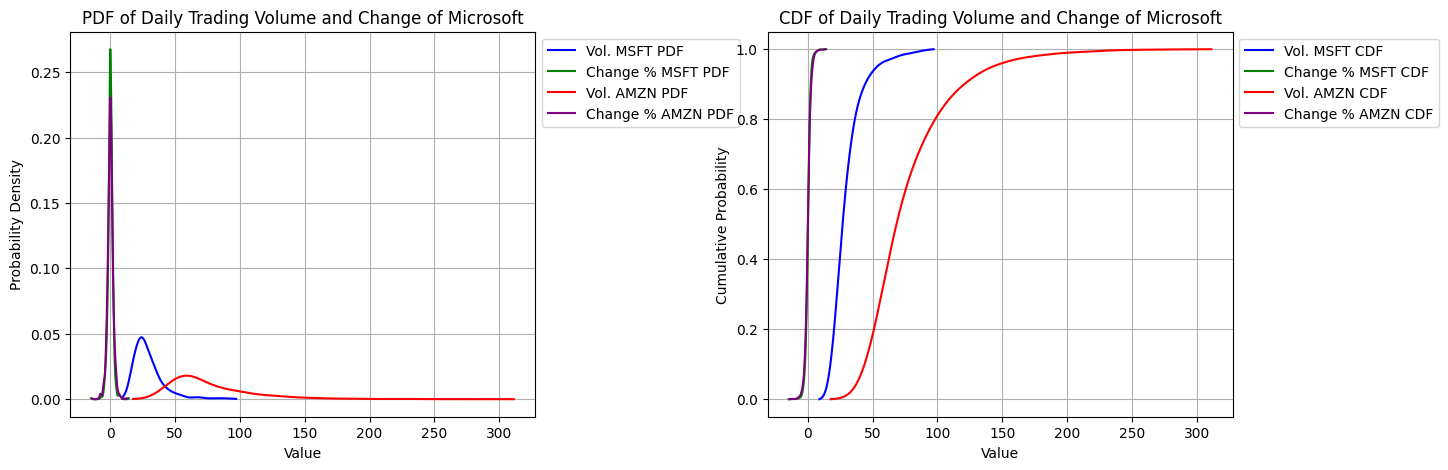

In [22]:
# Create 2 plots in order to have them side by side and easier to view
# using the microsfot PDFs y CDFs to plot
fig, subplots = plt.subplots( nrows=1, ncols=2, figsize=( 15, 5 ) )

# also The teacher told me to add amazon CDFs and PDFs to the graphics
# Plot for PDFs
subplots[0].plot( x_mic_vol, pdf_mic_vol, color='blue', label="Vol. MSFT PDF" )
subplots[0].plot( x_mic_change, pdf_mic_change, color='green', label="Change % MSFT PDF" )
subplots[0].plot( x_am_vol, pdf_am_vol, color='red', label="Vol. AMZN PDF" )
subplots[0].plot( x_am_change, pdf_am_change, color='purple', label="Change % AMZN PDF" )
subplots[0].set_title( "PDF of Daily Trading Volume and Change of Microsoft" )
subplots[0].set_xlabel( "Value" )
subplots[0].set_ylabel( "Probability Density" )
subplots[0].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[0].grid( True )

# Plot for CDFs
subplots[1].plot( x_mic_vol, cdf_mic_vol, color='blue', label="Vol. MSFT CDF" )
subplots[1].plot( x_mic_change, cdf_mic_change, color='green', label="Change % MSFT CDF" )
subplots[1].plot( x_am_vol, cdf_am_vol, color='red', label="Vol. AMZN CDF" )
subplots[1].plot( x_am_change, cdf_am_change, color='purple', label="Change % AMZN CDF" )
subplots[1].set_title( "CDF of Daily Trading Volume and Change of Microsoft" )
subplots[1].set_xlabel( "Value" )
subplots[1].set_ylabel( "Cumulative Probability" )
subplots[1].legend( loc='upper left', bbox_to_anchor=( 1,1 ) )
subplots[1].grid( True )
plt.savefig( "PDF_CDF3b.png" )

plt.subplots_adjust( wspace=0.5 )
plt.show()

c) Escriba unas breves líneas con sus conclusiones estadísticas. Este enlace puede ser de ayuda
https://www.investopedia.com/terms/p/pdf.asp


Repuesta:
Observando las PDFs, se puede ver como ambas de Change % (verde y morado) sugieren que los valores de estas  columnas son poco volátiles y giran en torno a 0 o un número muy cercano a este, lo que significa que el cambio que se realiza diariamente no es grande. Sin embargo las PDFs de de Volumen sugieren una menor concentración de estos valores, sobre todo en Amazon cuya curva es mucho más plana y alargada indicando que suelen realizar una mayor cantidad de contratos e inversiones, con una apuesta de dinero superior a las que suele realizar Microsfot.

Observando las CDFs podemos extraer de nuevo que para Change, la gráfica asciende rápidamente a 1 indicando que los valores son poco dispersos y están concentrados, como vimos en PDFs. Del mismo modo, observando las de Volumen, podemos ver que los valores de Volumen de Amazon están más dispersos y aunque la mayoría de ellas están entre los 50 y 100 donde se agrupa el 60% de los valores de las transacciones, mientras que para Microsoft rondan desde los valores de 10 a 50 donde se agrupan aproximadamente el 95% de las operaciones.

## Parte 4
---

a) Haga ahora de predictor de futuro. De todos los datos de cotización que tenga, considere el
primer 80% de ellos datos de entrenamiento y el 20% de los datos, es decir, los datos más
recientes, como los datos de prueba. Con este contexto, utilice un modelo presente en scikit-learn que intente modelar la función de precio de su acción. Un modelo lineal, aunque
ciertamente no será preciso, también es válido. Anímese a utilizar algún modelo más avanzado
que proporcione scikit-learn.

In [23]:
# Divide the dataset in 80% training and 20% testing, due to we are predicting the future temporal, we should use the order, so the first 80%
# of the days will be for training, and the restfor testing
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Restoring the changes realized in the last question
df = pd.read_csv( "./MSFT Historical Data.csv" )

# Convert the datetimes to be usefull
df["Date"] = pd.to_datetime( df["Date"] )

# Sort the dates to have it in order by date
df.sort_values( "Date", inplace=True )
print( f"Number of elements before preproces: { len( df ) }" )


# Transform non numeric columns into numeric:
# Convert change % column into a numeric column
df["Change float"] = df["Change %"].str.replace( '%', '' ).astype( float )

# Convert Vol data column into a numeric column
df["Vol. float"] = df["Vol."].str.replace( 'M', '' ).astype( float )

# Create a column with the day before information
df["Price before"] = df["Price"].shift( 1 )
df["Change float before"] = df["Change float"].shift( 1 )
df["Vol. float before"] = df["Vol. float"].shift( 1 )
df["Open before"] = df["Open"].shift( 1 )

# Delete the first row due to it has no price before, so it is useless and will break the model
df = df.dropna()
# Create the dataset that is going to be used through this part
df_numeric = df.drop( columns=["Vol.", "Change %"] )
print( f"Number of elements after preproces: { len( df_numeric ) }" )

# Convert date in year, month and data, i have tested that it has no influence in the results
# df_numeric['Year'] = df_numeric['Date'].dt.year
# df_numeric['Month'] = df_numeric['Date'].dt.month
# df_numeric['Day'] = df_numeric['Date'].dt.day

# Pearson correlation coefficient
correlation = df_numeric.corr()
print( correlation )


Number of elements before preproces: 1195
Number of elements after preproces: 1194
                         Date     Price      Open      High       Low  \
Date                 1.000000  0.879136  0.878860  0.881173  0.877747   
Price                0.879136  1.000000  0.998714  0.999373  0.999404   
Open                 0.878860  0.998714  1.000000  0.999460  0.999423   
High                 0.881173  0.999373  0.999460  1.000000  0.999239   
Low                  0.877747  0.999404  0.999423  0.999239  1.000000   
Change float        -0.030502 -0.000938 -0.038691 -0.022843 -0.021335   
Vol. float          -0.044365 -0.078702 -0.076841 -0.063564 -0.091405   
Price before         0.879323  0.997952  0.999264  0.998811  0.998711   
Change float before -0.030487 -0.009031 -0.004725 -0.008228 -0.004042   
Vol. float before   -0.044342 -0.077454 -0.077791 -0.068240 -0.087093   
Open before          0.879031  0.997009  0.998082  0.997859  0.997532   

                     Change float  Vol. 

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Due to the high correlation between open high low and price, i should only take one of them as predictors trying
# trying to avoid multicollinearity.So:
x_pred_variables = df_numeric[["Price before", "Open before", "Change float before", "Vol. float before"]]
y_pred_variable = df_numeric["Price"]

# Also I have tested using the following pred_variables combination ["Year","Open", "Low", "Vol. float"], ["Month","Open", "Low", "Vol. float"],
# ["Day","Open", "Low", "Change float"], ["Year", "Month","High", "Change float"], ["Year", "Month","High", "Vol. float"]
# now we have the data, lets create the model, i will start with a basic linear regresion, and after that with one more complex
x_train, x_test, y_train, y_test = train_test_split( x_pred_variables, y_pred_variable, test_size=0.2, shuffle=False )

# Now i will create a more complex model in order to compare both results:
# create the model using RandomForest
# use the same seed to be able to compare the results
model_RF = RandomForestRegressor( n_estimators=100, random_state=28 )
model_RF.fit( x_train, y_train )

# Evaluate the model score
price_pred_RF = model_RF.predict( x_test )

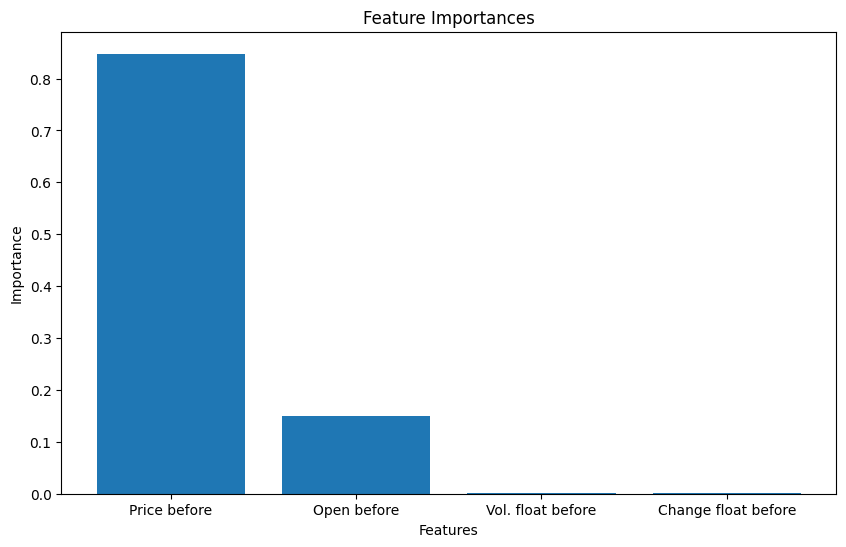

In [25]:
importances = model_RF.feature_importances_
# Let's see the importance of each feature
feature_names = x_train.columns
importances_df = pd.DataFrame( { "Feature": feature_names, "Importance": importances } )

# Sort the values by importance
importances_df = importances_df.sort_values( by="Importance", ascending=False )

# Plot the importances
plt.figure( figsize=( 10, 6 ) )
plt.bar( importances_df["Feature"], importances_df["Importance"] )
plt.xlabel( "Features" )
plt.ylabel( "Importance" )
plt.title( "Feature Importances" )
plt.savefig( "FeatureImportances4a.png" )

plt.show()

In [26]:
# to predict X day price
# give context to predict the price of the next day
x_variables = pd.DataFrame( [[330, 320, 0.7, 40.57]], columns=["Price before", "Open before", "Change float before", "Vol. float before"] )
price_pred = model_RF.predict( x_variables )
print( f"The price predicted for the next day is: { price_pred }" )

The price predicted for the next day is: [327.9774]


b) Calcule el error del modelo utilizado.


In [27]:
mse_RF = mean_squared_error( y_test, price_pred_RF )
r2_RF = r2_score( y_test, price_pred_RF )
print( "MSE: ", mse_RF )
print( "R^2: ", r2_RF )

MSE:  40.72128154004166
R^2:  0.9749242476416771


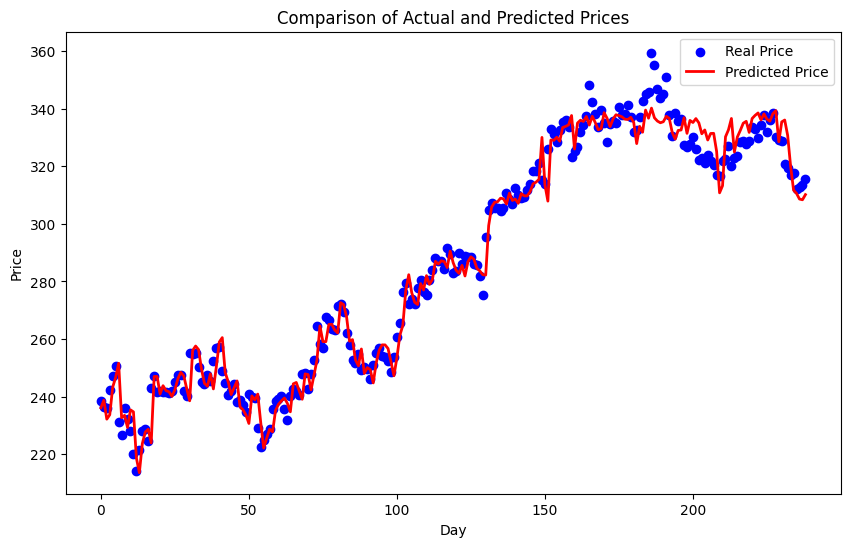

In [28]:
# Let's show the results
price_pred_RF = model_RF.predict( x_test )

plt.figure( figsize=( 10, 6 ) )

# plot real values vs predicted ones
plt.scatter( range( len( y_test ) ), y_test, color='blue', label='Real Price' )
plt.plot( range( len( price_pred_RF ) ), price_pred_RF, color='red', linewidth=2, label='Predicted Price' )

# Add legend and labels
plt.title( "Comparison of Actual and Predicted Prices" )
plt.xlabel( "Day" )
plt.ylabel( "Price" )
plt.legend()
plt.savefig( "PredictedvsReals4b.png" )
plt.show()
# Bearing in mind that this will display only the test result( 20% of data )


As you can see in the picture, the model almost can predict properly all the tests cases, it fails more with that days that the price get more variation as usual

c) Similar al apartado a), pero en esta ocasión utlizando un modelo perteneciente a tensorflow

In [29]:
# create the model using a model from tensorflow
import tensorflow as tf

# convert DF into numpy arrays
x = df_numeric[["Price before", "Open before", "Change float before", "Vol. float before"]].values
y= df_numeric["Price"].values

# Divide in train test dataset
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False )

# Characteristics scale, for RFR wasnt necesary, but it could affect to a neuronal network
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_test = scaler.transform( X_test )


In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l1, l2, l1_l2

# Create neuronal network
model_nn = Sequential()

# Input_dim => number of caracteristics that the model is waiting
# Taking shape[1]  will obtain the number of columns from the x_train dataset
# I have decided to use L2 trying to avoid overfitting
model_nn.add( Dense( 64, input_dim=X_train.shape[1], activation='relu' ) )  # Entry Layer
model_nn.add( Dense( 64, activation='relu', kernel_regularizer=l2( 0.01 ) ) )
model_nn.add( Dense( 32, activation='relu' ) )  # Hidden layer
model_nn.add( Dense( 1 ) )  # Output layer

# Compile the model
model_nn.compile( loss='mean_squared_error', optimizer='adam' )



In [31]:
# train the model
# the loss shown is mean squared error as selected before
model_nn.fit( X_train, Y_train, epochs=70, batch_size=10, verbose=1 )



Epoch 1/70

96/96 [==============================] - 1s 861us/step - loss: 44317.0430
Epoch 2/70
96/96 [==============================] - 0s 785us/step - loss: 5947.4282
Epoch 3/70
96/96 [==============================] - 0s 768us/step - loss: 2183.0010
Epoch 4/70
96/96 [==============================] - 0s 760us/step - loss: 1466.8613
Epoch 5/70
96/96 [==============================] - 0s 815us/step - loss: 997.5895
Epoch 6/70
96/96 [==============================] - 0s 921us/step - loss: 686.4534
Epoch 7/70
96/96 [==============================] - 0s 795us/step - loss: 467.9183
Epoch 8/70
96/96 [==============================] - 0s 857us/step - loss: 336.1395
Epoch 9/70
96/96 [==============================] - 0s 879us/step - loss: 236.0802
Epoch 10/70
96/96 [==============================] - 0s 799us/step - loss: 173.2452
Epoch 11/70
96/96 [==============================] - 0s 797us/step - loss: 126.9161
Epoch 12/70
96/96 [==============================] - 0s 784us/step - loss: 93.8

In [32]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate error

Y_pred = model_nn.predict( X_test )
mse = mean_squared_error( Y_test, Y_pred )
r2 = r2_score( Y_test, Y_pred )

print( "MSE:", mse )
print( "R^2:", r2 )


8/8 [==============================] - 0s 857us/step
MSE: 35.94365929200755
R^2: 0.9778662589886312


(Estos resultados pueden variar un poco cada vez que se genere y ejecute el modelo) Como se puede observar tras la ejecucionde 70 epochs con un tamaño de 10 en cada batch, el modelo es capaz de aprender y generalizar, realizando en la etapa de Test, un MSE de 30, es decir que sus errores suelen oscilar en +- 30 con respecto al valor esperado y un R^2 de 0.98, es decir, sugiere una muy buena generalizacion.

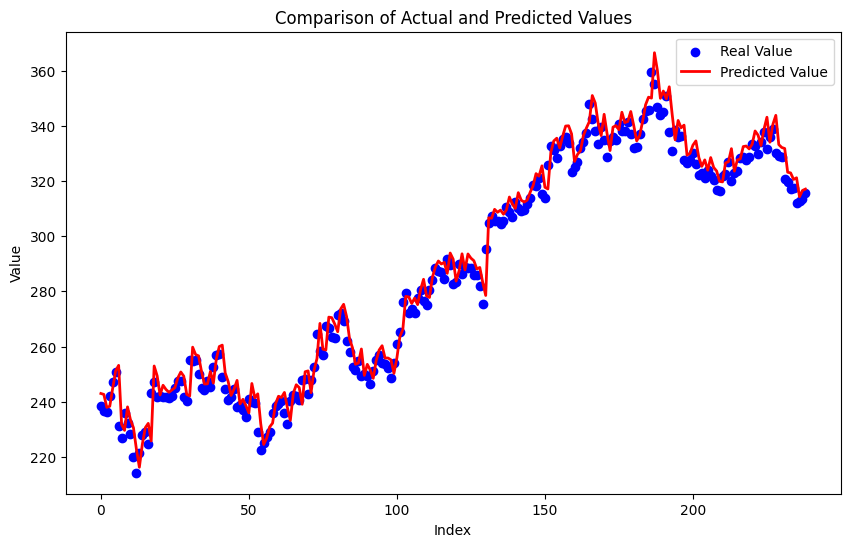

In [33]:
# Let's plot the results
plt.figure( figsize=( 10, 6 ) )

# Real values vs predicted
plt.scatter( range( len( Y_test ) ), Y_test, color='blue', label='Real Value' )
plt.plot( range( len( Y_pred ) ), Y_pred, color='red', linewidth=2, label='Predicted Value' )

# Show legend and labels
plt.title( "Comparison of Actual and Predicted Values" )
plt.xlabel( "Index" )
plt.ylabel( "Value" )
plt.legend()
plt.savefig( 'realVSpredicted4c.png' )
# show the plot
plt.show()

Como se puede observar en la imagen, la red neuronal es capaz de predicr con una gran precision el precio del dia siguiente mejor que Random Forest ya que es capaz de predecir mejor aquellos precios que tienen un mayor cambio, tanto hacia arriba como hacia abajo